# Crime in Silver Spring, MD and Temperature

The below script explores the relationship between the incidence of crime in Silver Spring, Maryland from 2017-2019 and the temperature of the weather. 
We used Pandas, Matplotlib, Linregress to accomplish our task.

[Logic behind our topic] We believe there might be a correlation between the temperature and the incidence of crime. During the winter when it's hardly feasible to be outside, it seems logical that there will be less incidence of crime compared to the summer, spring or fall.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

## Data Retrieval

Crime Data: We retrieved the raw data of crime statistic in Maryland from dataMontgomery (https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3) in the csv format. 

Climate Data: ____________________________________ [URL HERE] 

Limitation with API: _______________

We ran into the problem of not being able to get the temperature data for data point after our 2nd project meeting, and decided to get the average temperature of each month. ---------EXPLAIN THE VALIDITY OF USING CLIMATE DATA---------------

Because of this limitation we also have to limit our analysis to one city as opposed to using every city with the available data in our csv file. We selected our data to be of a city with the highest number of crimes, so we have a good amount of data.

In [2]:
# Crime Data
# Save file path to variable
crimeMD_path = "Crime_MD.csv"

# Read with Pandas
crime_df = pd.read_csv(crimeMD_path, low_memory=False)
crime_df

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,NaN,VEIRS MILL,NaN,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
1,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,NaN,GIRARD,NaN,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
2,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,GEORGIA,NaN,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)"
3,201230900,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"
4,201265312,1399,190055150,11/15/2019 03:31:20 PM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,MIDCOUNTY,NaN,HWY,11/15/2019 03:20:00 PM,NaN,39.159339,-77.198516,6D,"(39.1593, -77.1985)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212991,201248696,4104,190034187,07/18/2019 06:48:53 PM,90G,1,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,ROCKVILLE,...,NaN,MEADOW HALL,NaN,DR,07/18/2019 06:48:00 PM,NaN,39.075179,-77.112958,1D,"(39.0752, -77.113)"
212992,201250353,2902,190036349,07/30/2019 04:39:04 PM,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,ROCKVILLE,...,NaN,CRABBS BRANCH,NaN,WAY,07/11/2019 03:00:00 PM,07/11/2019 11:13:00 PM,39.119276,-77.156921,1D,"(39.1193, -77.1569)"
212993,201250255,2305,190035784,07/27/2019 01:20:11 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,BENTLEY,NaN,LA,07/19/2019 09:30:00 AM,07/27/2019 11:30:00 AM,39.030905,-77.057040,4D,"(39.0309, -77.057)"
212994,201243750,2203,190028212,06/13/2019 10:33:01 AM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,SILVER SPRING,...,NaN,SLIGO,NaN,AVE,06/13/2019 10:33:00 AM,06/13/2019 11:30:00 AM,38.990216,-77.024017,3D,"(38.9902, -77.024)"


In [3]:
# Climate Data
# Save file path to variable
climateMD_path = "silver_spring_climate.csv"

# Read with Pandas
climate_df = pd.read_csv(climateMD_path, low_memory=False)
climate_df

,Month,Temp
0,January,43
1,February,46
2,March,55
3,April,66
4,May,76
5,June,84
6,July,88
7,August,87
8,September,80
9,October,68


In [4]:
# Formatting the month for climate data for merge later
climate_df.columns = ['MonthName','Temp']
df = pd.to_datetime(climate_df['MonthName'], format='%B').dt.month
climate_df['Month'] = df
climate_df

,MonthName,Temp,Month
0,January,43,1
1,February,46,2
2,March,55,3
3,April,66,4
4,May,76,5
5,June,84,6
6,July,88,7
7,August,87,8
8,September,80,9
9,October,68,10


In [5]:
# Pulling out only the columns of interest
main_crime_df = crime_df[['Crime Name1', 'Crime Name2', 'Crime Name3', 'City', 'Start_Date_Time']]
main_crime_df

,Crime Name1,Crime Name2,Crime Name3,City,Start_Date_Time
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,01/16/2019 03:51:00 PM
1,Crime Against Property,Arson,ARSON - RESIDENTIAL,GAITHERSBURG,01/27/2019 06:05:00 PM
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,11/28/2019 06:08:00 AM
3,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,GAITHERSBURG,03/15/2019 10:50:00 AM
4,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,11/15/2019 03:20:00 PM
...,...,...,...,...,...
212991,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,ROCKVILLE,07/18/2019 06:48:00 PM
212992,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,DERWOOD,07/11/2019 03:00:00 PM
212993,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,KENSINGTON,07/19/2019 09:30:00 AM
212994,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,SILVER SPRING,06/13/2019 10:33:00 AM


In [6]:
# Remove data with entry not considered as 'crime' and changing columns name 
main_crime_df = main_crime_df.loc[main_crime_df['Crime Name1'] != 'Not a Crime']
clean_crime_df = main_crime_df.rename(columns={'Crime Name1': 'Crime Main Category',
                                             'Crime Name2': 'Crime Sub Category',
                                             'Start_Date_Time': 'Date & Time of Crime'})

# Changed the string format of the Date & Time to be in the date/time format
clean_crime_df['Date & Time of Crime']= pd.to_datetime(clean_crime_df['Date & Time of Crime'])

In [7]:
# City Selection: Explore what city has the highest number of crime - Silver Spring!
clean_crime_df['City'].value_counts()

SILVER SPRING         74168
GAITHERSBURG          30079
ROCKVILLE             29479
GERMANTOWN            20511
BETHESDA              14148
MONTGOMERY VILLAGE     6510
TAKOMA PARK            5514
POTOMAC                4190
CHEVY CHASE            4188
DERWOOD                3712
KENSINGTON             3401
OLNEY                  3229
BURTONSVILLE           2596
CLARKSBURG             2101
DAMASCUS               1665
BOYDS                  1410
BROOKEVILLE             601
POOLESVILLE             599
ASHTON                  283
SANDY SPRING            256
DICKERSON               210
CABIN JOHN              155
SPENCERVILLE            100
GLEN ECHO                57
BRINKLOW                 55
MOUNT AIRY               55
BARNESVILLE              35
LAUREL                   33
BEALLSVILLE              30
WASHINGTON               12
BELTSVILLE                8
WOODBINE                  6
HYATTSVILLE               6
LANHAM                    5
ADELPHI                   4
HIGHLAND            

In [8]:
# Create a crime dataframe for Silver Spring
silverspring_crime_df = clean_crime_df.loc[clean_crime_df['City'] == 'SILVER SPRING']
silverspring_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [9]:
# Figure out the timeline of our raw data
data_first_date = silverspring_crime_df['Date & Time of Crime'].min()
data_last_date = silverspring_crime_df['Date & Time of Crime'].max()

print(data_first_date)
print(data_last_date)

# Throw away 2016 and 2020 in order to have a data of a full year
silverspring_clean_df = silverspring_crime_df.loc[(silverspring_crime_df['Date & Time of Crime'] > '2016-12-31 23:59:59') & (silverspring_crime_df['Date & Time of Crime'] < '2020-01-01 00:00:00')]
silverspring_clean_df

2016-07-01 00:00:00
2020-07-17 17:00:00


,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00
...,...,...,...,...,...
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00
212990,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2019-07-10 13:10:00


In [10]:
# Extract just the year and month from the Data/Time column
silverspring_clean_df['Year'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).year
silverspring_clean_df['Month'] = pd.DatetimeIndex(silverspring_clean_df['Date & Time of Crime']).month

silverspring_clean_df.head(3)

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7


In [11]:
# Explore the types of crimes
silverspring_clean_df['Crime Main Category'].value_counts()

Crime Against Property    22440
Crime Against Society     19887
Other                      9395
Crime Against Person       4997
Name: Crime Main Category, dtype: int64

Overall Crime in Silver Spring
-------------------------------------------

In [12]:
# Paul's code starts here 

In [13]:
# Merge the cleaned crime data with the climate data
combined_df = pd.merge(silverspring_clean_df, climate_df, on='Month')
combined_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month,MonthName,Temp
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1,January,43
1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00,2019,1,January,43
2,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY (DESCRIBE OFFENSE),SILVER SPRING,2018-01-10 22:00:00,2018,1,January,43
3,Other,All Other Offenses,POLICE INFORMATION,SILVER SPRING,2017-01-02 22:57:00,2017,1,January,43
4,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,SILVER SPRING,2019-01-28 09:09:00,2019,1,January,43
...,...,...,...,...,...,...,...,...,...
56722,Crime Against Society,All Other Offenses,FUGITIVE FROM JUSTICE (OUT OF STATE),SILVER SPRING,2019-02-20 22:29:00,2019,2,February,46
56723,Crime Against Property,Counterfeiting/Forgery,COUNTERFEITING,SILVER SPRING,2019-02-21 20:11:00,2019,2,February,46
56724,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2019-02-01 00:00:00,2019,2,February,46
56725,Crime Against Property,Extortion/Blackmail,EXTORTION (DESCRIBE OFFENSE),SILVER SPRING,2019-02-16 12:00:00,2019,2,February,46


In [14]:
# Group the data by month
group_monthly = combined_df.groupby(['Year','Month'])
monthly = group_monthly['Crime Main Category'].count()
temp = group_monthly['Temp'].first()
monthly_temp_df = pd.DataFrame({'Crime' : monthly, 'Temperature' : temp})


In [15]:
# Create 4 bins to place average number of crime
bins = [40, 50, 70, 80, 90]

# Create labels for the bins
group_bins = ['Cold', 'Cool', 'Warm', 'Hot']

# Slice the data and place it into bins
bin_slice = pd.cut(monthly_temp_df['Temperature'], bins, labels=group_bins)

# Create a new column for the bins
monthly_temp_df['Temperature Category'] = bin_slice


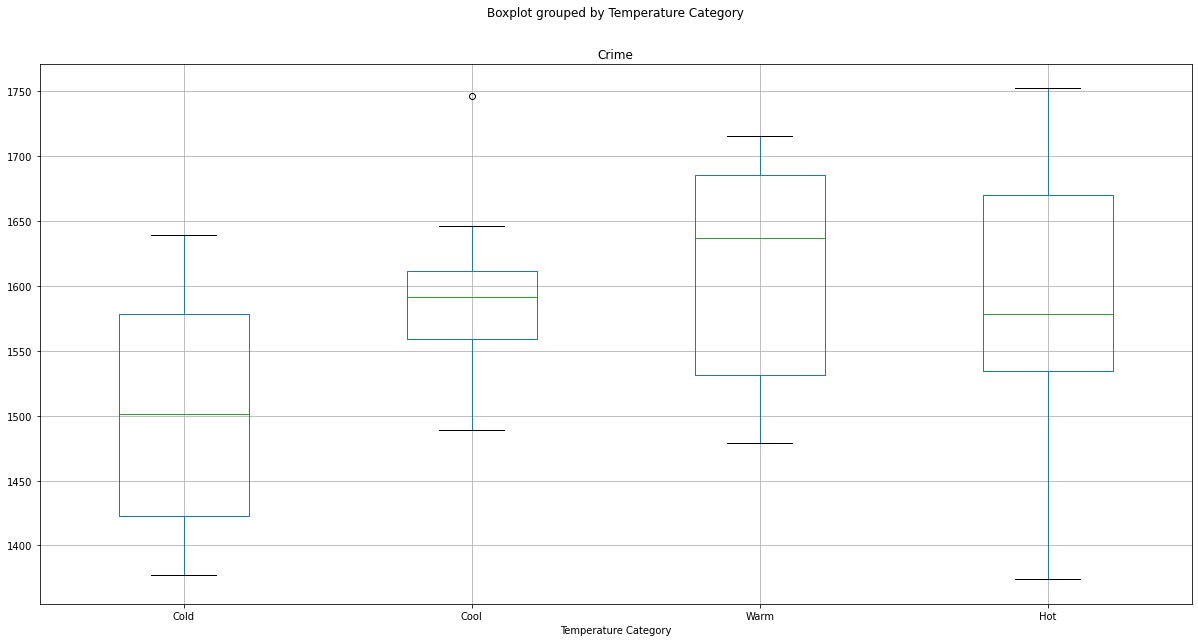

In [16]:
monthly_temp_df.boxplot('Crime', by='Temperature Category', figsize=(20,10))

In [17]:
# Divide the month data into dataframes of their categories
cold_df = monthly_temp_df.query('Month == 1 | Month == 2 | Month == 12')
cool_df = monthly_temp_df.query('Month == 3 | Month == 4 | Month == 11')
warm_df = monthly_temp_df.query('Month == 5 | Month == 9 | Month == 10')
hottest_df = monthly_temp_df.query('Month == 6 | Month == 7 | Month == 8')

Null Hypothesis:  Climate average temperature does not affect crime level in the city of Silver Spring, Maryland, in any way.

In [18]:
# Perform the ANOVA
stats.f_oneway(cold_df['Crime'], cool_df['Crime'], warm_df['Crime'], hottest_df['Crime'])

F_onewayResult(statistic=2.5229780533202533, pvalue=0.07526130880382127)

We cannot reject the null hypothesis.

Therefore based on the data we had in this overall group, we can not say that crime was influenced by the climate in Silver Spring, Maryland

In [19]:
# Paul's code ends here

## Crime Against Property/Other

In [20]:
# Dan's code starts here - Property/Other

In [21]:
# Separate Crime Against Property from other crimes
sspring_property = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Property')]
sspring_property

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-01-16 15:51:00,2019,1
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7
20,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,2019-09-17 15:30:00,2019,9
21,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2018-12-04 17:30:00,2018,12
47,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,SILVER SPRING,2019-10-10 10:20:00,2019,10
...,...,...,...,...,...,...,...
212975,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2019-06-09 20:15:00,2019,6
212977,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2019-07-25 22:54:00,2019,7
212981,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2019-06-27 22:00:00,2019,6
212983,Crime Against Property,Bad Checks,FRAUD - INSUFFICIENT FUNDS CHECK,SILVER SPRING,2019-06-21 16:30:00,2019,6


In [22]:
# Separate Property Crimes by Year
propcrime_2017 = sspring_property.loc[(sspring_property['Year'] == 2017)]
propcrime_2018 = sspring_property.loc[(sspring_property['Year'] == 2018)]
propcrime_2019 = sspring_property.loc[(sspring_property['Year'] == 2019)]
propcrime_2017

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
8,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,SILVER SPRING,2017-07-01 00:00:00,2017,7
108,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,SILVER SPRING,2017-12-21 00:00:00,2017,12
135,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,SILVER SPRING,2017-07-30 01:00:00,2017,7
292,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),SILVER SPRING,2017-07-08 14:00:00,2017,7
3200,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,SILVER SPRING,2017-05-25 12:00:00,2017,5
...,...,...,...,...,...,...,...
198569,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - CONFIDENCE GAME,SILVER SPRING,2017-03-04 10:06:00,2017,3
199913,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),SILVER SPRING,2017-10-11 00:00:00,2017,10
201645,Crime Against Property,Identity Theft,IDENTITY THEFT,SILVER SPRING,2017-12-25 08:37:00,2017,12
203879,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,SILVER SPRING,2017-12-01 12:16:00,2017,12


In [23]:
pc2017_data = propcrime_2017['Month'].value_counts()
pc2017_data = pd.DataFrame(pc2017_data)
pc2017_data = pc2017_data.sort_index()

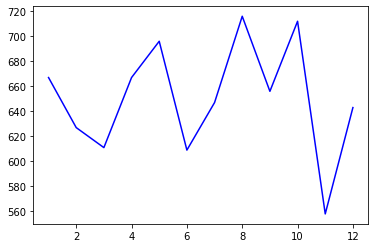

In [24]:
pc2017graph, = plt.plot(pc2017_data, color="blue", label="2017 Property Crime Data" )

In [25]:
pc2018_data = propcrime_2018['Month'].value_counts()
pc2018_data = pd.DataFrame(pc2018_data)
pc2018_data = pc2018_data.sort_index()

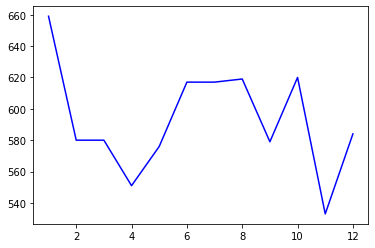

In [26]:
pc2018graph, = plt.plot(pc2018_data, color="blue", label="2018 Property Crime Data" )

In [27]:
pc2019_data = propcrime_2019['Month'].value_counts()
pc2019_data = pd.DataFrame(pc2019_data)
pc2019_data = pc2019_data.sort_index()

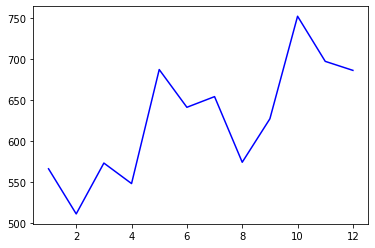

In [28]:
pc2019graph, = plt.plot(pc2019_data, color="blue", label="2019 Property Crime Data" )

In [29]:
md_temps = climate_df['Temp']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [30]:
pc2019_compiled_data = pc2019_data.rename(columns={"Month": "2019 Property Crime Count"})
pc2018_compiled_data = pc2018_data.rename(columns={"Month": "2018 Property Crime Count"})
pc2017_compiled_data = pc2017_data.rename(columns={"Month": "2017 Property Crime Count"})

pc2019_compiled_data.reset_index(drop=True, inplace=True)
pc2018_compiled_data.reset_index(drop=True, inplace=True)
pc2017_compiled_data.reset_index(drop=True, inplace=True)

pc2019_compiled_data['Temp'] = md_temps
pc2018_compiled_data['Temp'] = md_temps
pc2017_compiled_data['Temp'] = md_temps

pc2019_compiled_data['Month'] = months
pc2018_compiled_data['Month'] = months
pc2017_compiled_data['Month'] = months

pc2019_compiled_data['Year'] = 2019
pc2018_compiled_data['Year'] = 2018
pc2017_compiled_data['Year'] = 2017

pcMerged_data = pd.merge(pc2017_compiled_data, pc2018_compiled_data, on='Month', how='inner')
pcMerged_data = pd.merge(pcMerged_data, pc2019_compiled_data, on='Month', how='inner')

pcMerged_data.drop(columns = ['Temp_x', 'Temp_y'], inplace=True)
pcMerged_data


,2017 Property Crime Count,Month,Year_x,2018 Property Crime Count,Year_y,2019 Property Crime Count,Temp,Year
0,667,January,2017,659,2018,566,43,2019
1,627,February,2017,580,2018,511,46,2019
2,611,March,2017,580,2018,573,55,2019
3,667,April,2017,551,2018,548,66,2019
4,696,May,2017,576,2018,687,76,2019
5,609,June,2017,617,2018,641,84,2019
6,647,July,2017,617,2018,654,88,2019
7,716,August,2017,619,2018,574,87,2019
8,656,September,2017,579,2018,627,80,2019
9,712,October,2017,620,2018,752,68,2019


In [31]:
# Create a New Dataframe for number of crimes in each month, indexed by year & month
propMonthYeargroup = sspring_property.groupby(['Year','Month'])
prop_crime_count_mmyy = propMonthYeargroup['Month'].count()
prop_crime_count_mmyy_data = pd.DataFrame({'Number of Crime Incidence':prop_crime_count_mmyy})

# Reset the index to allow further data anaylysis
prop_crime_count_mmyy_data = prop_crime_count_mmyy_data.reset_index(drop=False)
prop_crime_count_mmyy_data

,Year,Month,Number of Crime Incidence
0,2017,1,667
1,2017,2,627
2,2017,3,611
3,2017,4,667
4,2017,5,696
5,2017,6,609
6,2017,7,647
7,2017,8,716
8,2017,9,656
9,2017,10,712


In [32]:
avgcrimepropgroup = prop_crime_count_mmyy_data.groupby('Month')
avgcrime_prop = avgcrimepropgroup['Number of Crime Incidence'].mean()

propcrime_avg_ct_df = pd.DataFrame({'Average Number of Crimes (Property)':avgcrime_prop})
propcrime_avg_ct_df = propcrime_avg_ct_df.reset_index(drop=False)
propcrime_avg_ct_df.drop(columns= 'Month')
propcrime_avg_ct_df['Month'] = months
propcrime_avg_ct_df['Temp'] = climate_df['Temp']
propcrime_avg_ct_df

,Month,Average Number of Crimes (Property),Temp
0,January,630.666667,43
1,February,572.666667,46
2,March,588.000000,55
3,April,588.666667,66
4,May,653.000000,76
5,June,622.333333,84
6,July,639.333333,88
7,August,636.333333,87
8,September,620.666667,80
9,October,694.666667,68


The r value is: 0.3550412952208746
The r-squared is: 0.12605432131211622


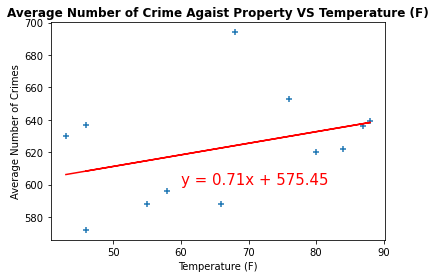

In [33]:
# Perform regression to look at average of crime and temperature
x_avgprop = propcrime_avg_ct_df['Temp']
y_avgprop = propcrime_avg_ct_df['Average Number of Crimes (Property)'].astype(int)

plt.scatter(x_avgprop, y_avgprop, marker='+')

# Labels
plt.xlabel('Temperature (F)')
plt.ylabel('Average Number of Crimes')
plt.title('Average Number of Crime Agaist Property VS Temperature (F)', fontsize=12, fontweight='bold')
# plt.legend(loc="best")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avgprop, y_avgprop)
regress_values = x_avgprop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_avgprop,regress_values,"r-")
plt.annotate(line_eq,(60,600),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [34]:
# Dan's code ends here

## Crime Against Person

In [35]:
# Cynthia's code starts here - Person

Sub-Hypothesis: We believe that as temperature decreases to a certain point during the winter, the crime against person will likely decreases. This is because people are less likely to come out during the winter time when it gets too cold, making crime occur less.


In [36]:
# Create Crime Against Person df
person_crime_df = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Person'), :]
person_crime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
2,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2019-11-28 06:08:00,2019,11
50,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,SILVER SPRING,2019-10-08 21:08:00,2019,10
131,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,SILVER SPRING,2018-10-01 00:00:00,2018,10
241,Crime Against Person,Fondling,SEX ASSAULT - FONDLING,SILVER SPRING,2019-08-18 12:00:00,2019,8
321,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,SILVER SPRING,2019-10-15 00:25:00,2019,10
...,...,...,...,...,...,...,...
212889,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-06-30 10:41:00,2019,6
212935,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON,SILVER SPRING,2019-06-29 22:10:00,2019,6
212946,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-05-24 11:00:00,2019,5
212950,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2019-07-24 17:28:00,2019,7


In [37]:
# Explore the types of crimes against person
person_crime_df['Crime Sub Category'].value_counts()

Simple Assault                            3582
Aggravated Assault                         730
Forcible Rape                              217
Fondling                                   157
Forcible Fondling                           85
Forcible Sodomy                             73
Sexual Assault With An Object               51
Intimidation                                49
Murder and Nonnegligent Manslaughter        20
Kidnapping/Abduction                        14
All Other Offenses                          10
Human Trafficking, Commercial Sex Acts       7
Justifiable Homicide                         2
Name: Crime Sub Category, dtype: int64

In [38]:
# Using Groupby to get the # of crime incidence for each month
personmonthgroup = person_crime_df.groupby('Month')
personcrime_count_month = personmonthgroup['Month'].count()
personcrime_count_month

# Turn count of crime into a dataframe
personcrime_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_month})

# Drop the index to get month column, add month name 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
personcrime_index_df = personcrime_df.reset_index(drop=True)
personcrime_index_df['Month'] = months
personcrime_index_df = personcrime_index_df[['Month','Number of Crime Incidence']]
personcrime_index_df

,Month,Number of Crime Incidence
0,January,384
1,February,362
2,March,434
3,April,404
4,May,439
5,June,442
6,July,405
7,August,404
8,September,471
9,October,416


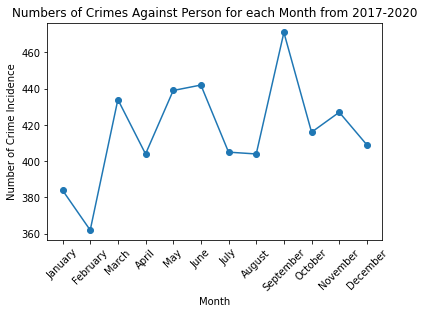

In [39]:
# Visualize the incidence of Crime Against Person for each month from 2017-2020
x_all = personcrime_index_df['Month']
y_all = personcrime_index_df['Number of Crime Incidence']

plt.plot(x_all, y_all, marker='o')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month from 2017-2020')

plt.show()

In [40]:
# Create different df for different year (2017-2019)

person_crime_2017df = person_crime_df.loc[person_crime_df['Year'] == 2017]
person_crime_2018df = person_crime_df.loc[person_crime_df['Year'] == 2018]
person_crime_2019df = person_crime_df.loc[person_crime_df['Year'] == 2019]

In [41]:
# Number of crime in each month for 2017

personmonth2017 = person_crime_2017df.groupby('Month')
personcrime_ct_2017 = personmonth2017['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2017df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2017})

# Drop the index to get month column, add month name 
personcrime_ct_2017df = personcrime_ct_2017df.reset_index(drop=True)
personcrime_ct_2017df['Month'] = months
personcrime_ct_2017df = personcrime_ct_2017df[['Month','Number of Crime Incidence']]
personcrime_ct_2017df

,Month,Number of Crime Incidence
0,January,145
1,February,109
2,March,142
3,April,133
4,May,125
5,June,135
6,July,136
7,August,132
8,September,159
9,October,149


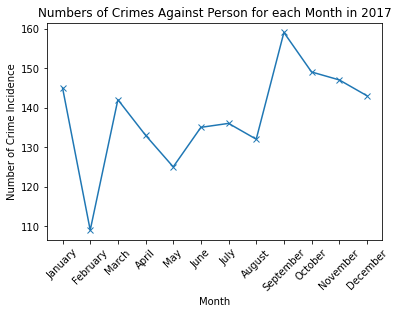

In [42]:
# Visualize the incidence of Crime Against Person for each month from 2017
x_2017 = personcrime_ct_2017df['Month']
y_2017 = personcrime_ct_2017df['Number of Crime Incidence']

handle17, = plt.plot(x_2017, y_2017, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2017')

plt.show()

In [43]:
# Number of crime in each month for 2018

personmonth2018 = person_crime_2018df.groupby('Month')
personcrime_ct_2018 = personmonth2018['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2018df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2018})

# Drop the index to get month column, add month name 
personcrime_ct_2018df = personcrime_ct_2018df.reset_index(drop=True)
personcrime_ct_2018df['Month'] = months
personcrime_ct_2018df = personcrime_ct_2018df[['Month','Number of Crime Incidence']]
personcrime_ct_2018df

,Month,Number of Crime Incidence
0,January,129
1,February,129
2,March,156
3,April,131
4,May,168
5,June,158
6,July,129
7,August,148
8,September,165
9,October,135


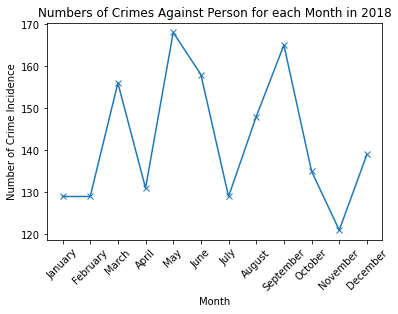

In [44]:
# Visualize the incidence of Crime Against Person for each month from 2018
x_2018 = personcrime_ct_2018df['Month']
y_2018 = personcrime_ct_2018df['Number of Crime Incidence']

handle18, = plt.plot(x_2018, y_2018, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2018')

plt.show()

In [45]:
# Number of crime in each month for 2019

personmonth2019 = person_crime_2019df.groupby('Month')
personcrime_ct_2019 = personmonth2019['Month'].count()

# Turn count of crime into a dataframe
personcrime_ct_2019df = pd.DataFrame({'Number of Crime Incidence':personcrime_ct_2019})

# Drop the index to get month column, add month name 
personcrime_ct_2019df = personcrime_ct_2019df.reset_index(drop=True)
personcrime_ct_2019df['Month'] = months
personcrime_ct_2019df = personcrime_ct_2019df[['Month','Number of Crime Incidence']]
personcrime_ct_2019df

,Month,Number of Crime Incidence
0,January,110
1,February,124
2,March,136
3,April,140
4,May,146
5,June,149
6,July,140
7,August,124
8,September,147
9,October,132


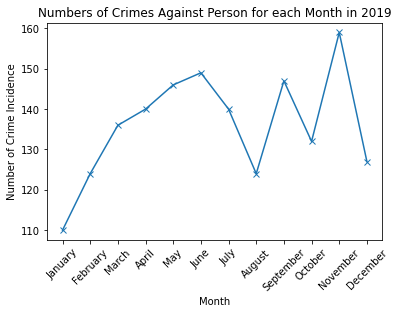

In [46]:
# Visualize the incidence of Crime Against Person for each month from 2019
x_2019 = personcrime_ct_2019df['Month']
y_2019 = personcrime_ct_2019df['Number of Crime Incidence']

handle19, = plt.plot(x_2019, y_2019, marker='x')
plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in 2019')

plt.show()

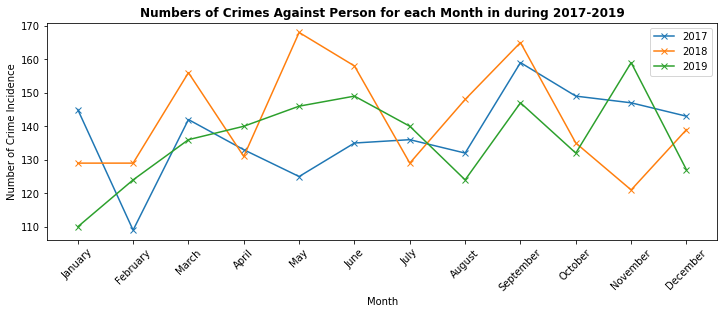

In [47]:
# Visualize the incidence of Crime Agasint person for all three years
plt.figure(figsize=(12,4))
# Graph from 2017
handle17, = plt.plot(x_2017, y_2017, marker='x', label='2017')
# Graph from 2018
handle18, = plt.plot(x_2018, y_2018, marker='x', label='2018')
# Graph from 2019
handle19, = plt.plot(x_2019, y_2019, marker='x', label='2019')


plt.xticks(rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Crime Incidence')
plt.title('Numbers of Crimes Against Person for each Month in during 2017-2019', fontsize=12, fontweight='bold')

plt.legend(loc="best")
plt.show()

Observation: Overall, there seems to be lower indcidence of crime agaist person overall in January-February, and higher crime incidence in September.

In [48]:
# Dataframe of Number of Crime incidence for all the years
personcrime_ct_split_df =  pd.DataFrame({'2017 Count':personcrime_ct_2017,
                                        '2018 Count': personcrime_ct_2018,
                                        '2019 Count': personcrime_ct_2019})
personcrime_ct_split_df

,2017 Count,2018 Count,2019 Count
Month,,,
1,145,129,110
2,109,129,124
3,142,156,136
4,133,131,140
5,125,168,146
6,135,158,149
7,136,129,140
8,132,148,124
9,159,165,147


In [49]:
# Adding climate and crime analysis
personcrime_climate_df = pd.merge(personcrime_ct_split_df, climate_df, how='left', on='Month')
# Removing Month number column
del personcrime_climate_df['Month']
# Rename and re-organize the columns in the dataframe
personcrime_climate_df = personcrime_climate_df.rename(columns={
    'MonthName': 'Month', 'Temp': 'Temperature (F)'
})
personcrime_climate_df = personcrime_climate_df[['Month','2017 Count', '2018 Count', '2019 Count', 'Temperature (F)']]
personcrime_climate_df

,Month,2017 Count,2018 Count,2019 Count,Temperature (F)
0,January,145,129,110,43
1,February,109,129,124,46
2,March,142,156,136,55
3,April,133,131,140,66
4,May,125,168,146,76
5,June,135,158,149,84
6,July,136,129,140,88
7,August,132,148,124,87
8,September,159,165,147,80
9,October,149,135,132,68


Statistical Analysis

In [50]:
# Create a New Dataframe for number of crimes in each month, indexed by year & month
personmonthyeargroup = person_crime_df.groupby(['Year','Month'])
personcrime_count_mmyy = personmonthyeargroup['Month'].count()
personcrime_count_mmyy_df = pd.DataFrame({'Number of Crime Incidence':personcrime_count_mmyy})
personcrime_count_mmyy_df

Number of Crime Incidence
Year Month                           
2017 1                            145
     2                            109
     3                            142
     4                            133
     5                            125
     6                            135
     7                            136
     8                            132
     9                            159
     10                           149
     11                           147
     12                           143
2018 1                            129
     2                            129
     3                            156
     4                            131
     5                            168
     6                            158
     7                            129
     8                            148
     9                            165
     10                           135
     11                           121
     12                           139
2019 1                            110
     2                            124
     3                            136
     4                            140
     5                            146
     6                            149
     7                            140
     8                            124
     9                            147
     10                           132
     11                           159
     12                           127

In [51]:
# Reset the index to allow further data anaylysis
personcrime_count_mmyy_index_df = personcrime_count_mmyy_df.reset_index(drop=False)
personcrime_count_mmyy_index_df

,Year,Month,Number of Crime Incidence
0,2017,1,145
1,2017,2,109
2,2017,3,142
3,2017,4,133
4,2017,5,125
5,2017,6,135
6,2017,7,136
7,2017,8,132
8,2017,9,159
9,2017,10,149


In [52]:
# Taking the average of the amount of crime for each month from 2017-2019
avgcrimepersongroup = personcrime_count_mmyy_index_df.groupby('Month')
avgcrime_person = avgcrimepersongroup['Number of Crime Incidence'].mean()

personcrime_avg_ct_df = pd.DataFrame({'Average Number of Crime (Person)':avgcrime_person})
personcrime_avg_ct_df = personcrime_avg_ct_df.reset_index(drop=False)
personcrime_avg_ct_df

,Month,Average Number of Crime (Person)
0,1,128.000000
1,2,120.666667
2,3,144.666667
3,4,134.666667
4,5,146.333333
5,6,147.333333
6,7,135.000000
7,8,134.666667
8,9,157.000000
9,10,138.666667


In [53]:
# Merge the average of crime df with climate df
avgcrime_person_temp_df = pd.merge(personcrime_avg_ct_df, climate_df, how='inner', on='Month')
avgcrime_person_temp_df

,Month,Average Number of Crime (Person),MonthName,Temp
0,1,128.000000,January,43
1,2,120.666667,February,46
2,3,144.666667,March,55
3,4,134.666667,April,66
4,5,146.333333,May,76
5,6,147.333333,June,84
6,7,135.000000,July,88
7,8,134.666667,August,87
8,9,157.000000,September,80
9,10,138.666667,October,68


In [54]:
# Removing Month number column
del avgcrime_person_temp_df['Month']

In [55]:
# Rename and re-organize the columns in the dataframe
avgcrime_person_temp_df = avgcrime_person_temp_df.rename(columns={
    'MonthName': 'Month', 'Temp': 'Temperature (F)'
})
avgcrime_person_temp_df = avgcrime_person_temp_df[['Month','Average Number of Crime (Person)', 'Temperature (F)']]

avgcrime_person_temp_df

,Month,Average Number of Crime (Person),Temperature (F)
0,January,128.000000,43
1,February,120.666667,46
2,March,144.666667,55
3,April,134.666667,66
4,May,146.333333,76
5,June,147.333333,84
6,July,135.000000,88
7,August,134.666667,87
8,September,157.000000,80
9,October,138.666667,68


The r value is: 0.5013051626907573
The r-squared is: 0.25130686614040665


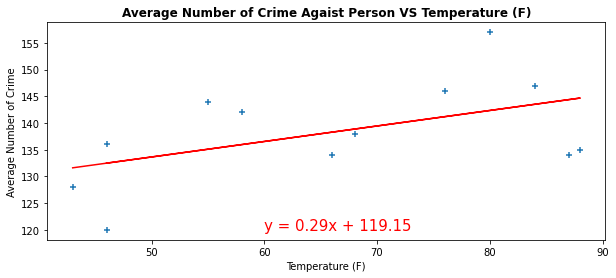

In [56]:
# Perform regression to look at average of crime and temperature
plt.figure(figsize=(10,4))
x_avgperson = avgcrime_person_temp_df['Temperature (F)']
y_avgperson = avgcrime_person_temp_df['Average Number of Crime (Person)'].astype(int)

plt.scatter(x_avgperson, y_avgperson, marker='+')

# Labels
plt.xlabel('Temperature (F)')
plt.ylabel('Average Number of Crime')
plt.title('Average Number of Crime Agaist Person VS Temperature (F)', fontsize=12, fontweight='bold')
# plt.legend(loc="best")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avgperson, y_avgperson)
regress_values = x_avgperson * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_avgperson,regress_values,"r-")
plt.annotate(line_eq,(60,120),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

Our r value indicates that there is a moderate positive correlation between the temperature and the average number of crime agaisnt person. Our r squared is very low and suggests that the predictive power of our regression is not very reliable.

In [57]:
## Further analysis on the temperature and the incidence of crime
# Sort the df by temperature to get some insight
avgcrime_person_temp_df.sort_values('Temperature (F)', ascending=False)

,Month,Average Number of Crime (Person),Temperature (F)
6,July,135.000000,88
7,August,134.666667,87
5,June,147.333333,84
8,September,157.000000,80
4,May,146.333333,76
9,October,138.666667,68
3,April,134.666667,66
10,November,142.333333,58
2,March,144.666667,55
1,February,120.666667,46


In [58]:
# Create 4 bins to place average number of crime
bins = [40, 50, 67, 80, 90]

# Create labels for the bins
group_bins = ['Cold', 'Cool', 'Warm', 'Hot']

# Slice the data and place it into bins
bin_slice = pd.cut(avgcrime_person_temp_df['Temperature (F)'], bins, labels=group_bins)

# Create a new column where the data shows the bins they belong
avgcrime_person_temp_df['Temperature Category'] = bin_slice
avgcrime_person_temp_df

,Month,Average Number of Crime (Person),Temperature (F),Temperature Category
0,January,128.000000,43,Cold
1,February,120.666667,46,Cold
2,March,144.666667,55,Cool
3,April,134.666667,66,Cool
4,May,146.333333,76,Warm
5,June,147.333333,84,Hot
6,July,135.000000,88,Hot
7,August,134.666667,87,Hot
8,September,157.000000,80,Warm
9,October,138.666667,68,Warm


In [59]:
# Group the data according to the temperature category
temp_group = avgcrime_person_temp_df.groupby('Temperature Category')

# Get the average # of crime for each temperature
tempgroup_avg_df = temp_group[['Average Number of Crime (Person)']].mean()

# Formating the average number of crime to be whole number
tempgroup_avg_df.astype(int)

,Average Number of Crime (Person)
Temperature Category,
Cold,128
Cool,140
Warm,147
Hot,139


The incidence of crime against person seems to be lower when the tempearture is colder, and highest when the temperature is warm.

Next, we perform hypothesis testing to see if any of these temperature category is statistically significant...

# Hypothesis attempt #1 - NOT STATISTICALLY SIGNIFICANT

In [60]:
## Hypothesis Test
# Setting up each group using the data from 2017, 2018, 2019
cold_dec = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 12]['Number of Crime Incidence']
cold_jan = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 1]['Number of Crime Incidence']
cold_feb = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 2]['Number of Crime Incidence']

cool_nov = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 11]['Number of Crime Incidence']
cool_mar = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 3]['Number of Crime Incidence']
cool_apr = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 4]['Number of Crime Incidence']

warm_may = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 5]['Number of Crime Incidence']
warm_sep = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 9]['Number of Crime Incidence']
warm_oct = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 10]['Number of Crime Incidence']


hot_jun = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 6]['Number of Crime Incidence']
hot_jul = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 7]['Number of Crime Incidence']
hot_aug = personcrime_count_mmyy_index_df[personcrime_count_mmyy_index_df['Month'] == 8]['Number of Crime Incidence']

In [61]:
# Perform the ANOVA
stats.f_oneway(cold_dec, cold_jan, cold_feb, cool_nov, cool_mar, cool_apr, warm_may, warm_sep, warm_oct, hot_jun, hot_jul, hot_aug)

F_onewayResult(statistic=1.706422737462572, pvalue=0.1323455065402189)

Dom's comment:
I was saying you'd have four groups (hot, cold, warm, cool) and that the list for each group would have nine values in it.
The way you did it is also fine, but it's using months instead of the hot, cold, warm, and cool categories. (Even though you're appending those names to the variables, they don't really play a role in your current analysis.)

Statistical Conclusion: The p-value is > 0.05 suggesting that the difference in number of crime incidence against person for each temperature category is not statistically significant.

# Hypothesis attempt #2 -- STATISTICALLY SIGNIFICANT

In [62]:
## Hypothesis Test
# Setting up each temparture category group using the data from 2017, 2018 & 2019
cold = personcrime_count_mmyy_index_df[((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 12)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 12)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 12)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 1)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 1)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 1)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 2)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 2)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 2))]['Number of Crime Incidence']
                                        
cool = personcrime_count_mmyy_index_df[((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 11)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 11)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 11)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 3)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 3)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 3)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 4)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 4)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 4))]['Number of Crime Incidence']                                   

warm = personcrime_count_mmyy_index_df[((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 5)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 5)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 5)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 9)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 9)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 9)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 10)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 10)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 10))]['Number of Crime Incidence']  

hot = personcrime_count_mmyy_index_df[((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 6)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 6)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 6)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 7)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 7)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 7)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2017) & (personcrime_count_mmyy_index_df['Month'] == 8)) | 
                                       ((personcrime_count_mmyy_index_df['Year'] == 2018) & (personcrime_count_mmyy_index_df['Month'] == 8)) |
                                       ((personcrime_count_mmyy_index_df['Year'] == 2019) & (personcrime_count_mmyy_index_df['Month'] == 8))]['Number of Crime Incidence']

In [63]:
# Perform the ANOVA test
stats.f_oneway(cold, cool, warm, hot)

F_onewayResult(statistic=3.4111787493082453, pvalue=0.02911753429229357)

Statistical Conclusion: The p-value is < 0.05 suggesting that the difference in the number of crime against person for each temperature category is statistically significant. The weather temperature seems to be a factor in the number of crime against person in Silver Spring, Maryland.

We acknowledge that the limitation of not having the real temperature data for Silver Spring, MD during 2017-2019 essentially negates the validity of our statistically significant result. However, if we are to perform the same analysis using the real tempearture data, we would expect our statistically significant results to be more valid.

In [64]:
# Cynthia's code ends here

## Crime Against Society

Sub-hypothesis: While we believe that weather will affect overall crime and certain types of crime in Silver Spring, we do not believe that weather influences the rate of crime against society. The top three crimes in this category are Drug/Narcotic Violations, Driving Under the Influence, and Liquor Law Violations, which account for 69% of Crimes Against Society in Silver the weather will not have a statistically significant impact on the crime rates.

In [65]:
#Society crimes df
scrime_df = silverspring_clean_df.loc[(silverspring_clean_df['Crime Main Category'] == 'Crime Against Society'), :]
scrime_df

,Crime Main Category,Crime Sub Category,Crime Name3,City,Date & Time of Crime,Year,Month
11,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,SILVER SPRING,2019-01-07 20:00:00,2019,1
23,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,2019-11-28 01:54:00,2019,11
42,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,2018-11-03 00:45:00,2018,11
55,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,SILVER SPRING,2018-08-10 01:38:00,2018,8
94,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,SILVER SPRING,2019-10-25 21:24:00,2019,10
...,...,...,...,...,...,...,...
212920,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,SILVER SPRING,2019-07-24 19:59:00,2019,7
212924,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,SILVER SPRING,2019-06-11 08:56:00,2019,6
212947,Crime Against Society,All Other Offenses,OBSTRUCT POLICE (DESCRIBE OFFENSE),SILVER SPRING,2019-06-10 23:47:00,2019,6
212951,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE DRUGS,SILVER SPRING,2019-06-14 19:32:00,2019,6


In [93]:
scrime_df["Crime Sub Category"].value_counts()

Drug/Narcotic Violations                7204
Driving Under the Influence             3361
Liquor Law Violations                   3266
Disorderly Conduct                      1932
All Other Offenses                      1755
Trespass of Real Property               1135
Drug Equipment Violations                526
Weapon Law Violations                    478
Family Offenses, NonViolent              139
Prostitution                              26
Curfew/Loitering/Vagrancy Violations      19
Peeping Tom                               17
Drunkenness                               15
Pornography/Obscene Material              14
Name: Crime Sub Category, dtype: int64

In [66]:
#crime per month
society_month = scrime_df.groupby("Month")
society_month_count = society_month["Month"].count()
society_month_count

#df
society_df = pd.DataFrame({"Number of Crime Incidence":society_month_count})

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
scrime_index_df = society_df.reset_index(drop=True)
scrime_index_df["Month"] = months
scrime_index_df = scrime_index_df[["Month","Number of Crime Incidence"]]
scrime_index_df

,Month,Number of Crime Incidence
0,January,1575
1,February,1584
2,March,1852
3,April,1688
4,May,1716
5,June,1646
6,July,1786
7,August,1665
8,September,1636
9,October,1635


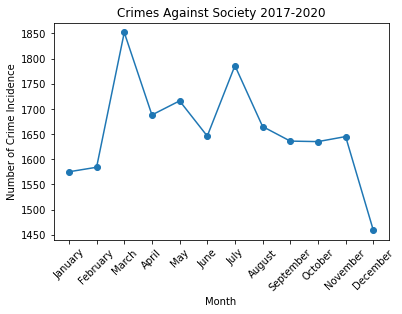

In [67]:
#graph
x_all = scrime_index_df["Month"]
y_all = scrime_index_df["Number of Crime Incidence"]


plt.plot(x_all, y_all, marker='o')
plt.xticks(rotation=45)

plt.xlabel("Month")
plt.ylabel("Number of Crime Incidence")
plt.title("Crimes Against Society 2017-2020")

plt.show()

In [68]:
#df for each year
scrime_2017df = scrime_df.loc[scrime_df["Year"] == 2017]
scrime_2018df = scrime_df.loc[scrime_df["Year"] == 2018]
scrime_2019df = scrime_df.loc[scrime_df["Year"] == 2019]

In [69]:
#crimes per month 2017
scrimemonth2017 = scrime_2017df.groupby("Month")
scrime2017count = scrimemonth2017["Month"].count()

#2017 df
society_2017df = pd.DataFrame({"Number of Crime Incidence":scrime2017count})

#index
society_2017df = society_2017df.reset_index(drop=True)
society_2017df["Month"] = months
society_2017df = society_2017df[["Month", "Number of Crime Incidence"]]
society_2017df

,Month,Number of Crime Incidence
0,January,562
1,February,515
2,March,619
3,April,522
4,May,602
5,June,525
6,July,551
7,August,615
8,September,602
9,October,634


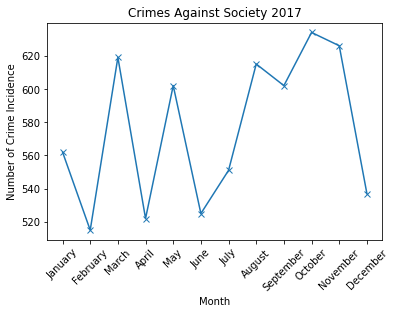

In [70]:
#graph
x_2017 = society_2017df["Month"]
y_2017 = society_2017df["Number of Crime Incidence"]

handle17, = plt.plot(x_2017, y_2017, marker="x")
plt.xticks(rotation=45)

plt.xlabel("Month")
plt.ylabel("Number of Crime Incidence")
plt.title("Crimes Against Society 2017")

plt.show()

In [71]:
#crimes per month 2018
scrimemonth2018 = scrime_2018df.groupby("Month")
scrime2018count = scrimemonth2018["Month"].count()

#2018 df
society_2018df = pd.DataFrame({"Number of Crime Incidence":scrime2018count})

#index
society_2018df = society_2018df.reset_index(drop=True)
society_2018df["Month"] = months
society_2018df = society_2018df[["Month", "Number of Crime Incidence"]]
society_2018df

,Month,Number of Crime Incidence
0,January,553
1,February,554
2,March,587
3,April,559
4,May,518
5,June,640
6,July,736
7,August,638
8,September,583
9,October,567


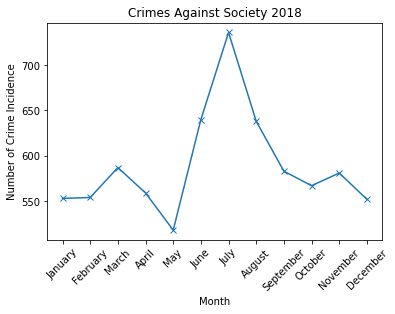

In [72]:
#graph
x_2018 = society_2018df["Month"]
y_2018 = society_2018df["Number of Crime Incidence"]

handle18, = plt.plot(x_2018, y_2018, marker="x")
plt.xticks(rotation=45)

plt.xlabel("Month")
plt.ylabel("Number of Crime Incidence")
plt.title("Crimes Against Society 2018")

plt.show()

In [73]:
#crimes per month 2019
scrimemonth2019 = scrime_2019df.groupby("Month")
scrime2019count = scrimemonth2019["Month"].count()

#2018 df
society_2019df = pd.DataFrame({"Number of Crime Incidence":scrime2019count})

#index
society_2019df = society_2019df.reset_index(drop=True)
society_2019df["Month"] = months
society_2019df = society_2019df[["Month", "Number of Crime Incidence"]]
society_2019df

,Month,Number of Crime Incidence
0,January,460
1,February,515
2,March,646
3,April,607
4,May,596
5,June,481
6,July,499
7,August,412
8,September,451
9,October,434


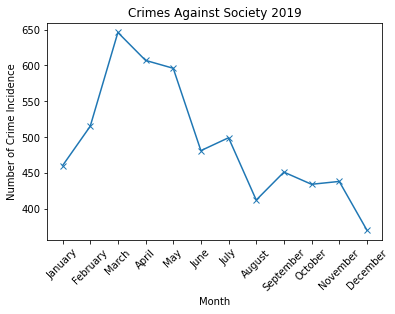

In [74]:
#graph
x_2019 = society_2019df["Month"]
y_2019 = society_2019df["Number of Crime Incidence"]

handle19, = plt.plot(x_2019, y_2019, marker="x")
plt.xticks(rotation=45)

plt.xlabel("Month")
plt.ylabel("Number of Crime Incidence")
plt.title("Crimes Against Society 2019")
plt.show()

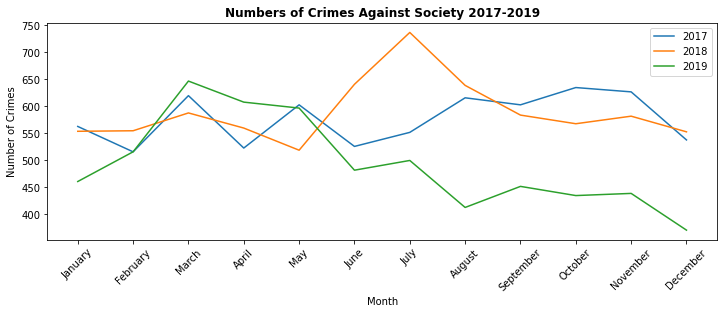

In [94]:
#show all 3 figures
plt.figure(figsize=(12,4))
handle17, = plt.plot(x_2017, y_2017, label="2017")
handle18, = plt.plot(x_2018, y_2018, label="2018")
handle19, = plt.plot(x_2019, y_2019, label="2019")

plt.xticks(rotation=45)

plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Numbers of Crimes Against Society 2017-2019", fontsize=12, fontweight="bold")

plt.legend(loc="best")
plt.show()

Observation: While 2017 does show a rise in crime in months that typically have higher temperatures, 2019 actually shows a steady decline in crime throughout the year. The most indicences occurred in months when it is typically colder. 

In [76]:
societycrime_split_df = pd.DataFrame({"2017 Crimes": scrime2017count,
                                      "2018 Crimes": scrime2018count,
                                      "2019 Crimes": scrime2019count})
societycrime_split_df

,2017 Crimes,2018 Crimes,2019 Crimes
Month,,,
1,562,553,460
2,515,554,515
3,619,587,646
4,522,559,607
5,602,518,596
6,525,640,481
7,551,736,499
8,615,638,412
9,602,583,451


In [77]:
#merge crime and climate
scrime_climate_df = pd.merge(societycrime_split_df, climate_df, how="left", on="Month")
del scrime_climate_df["Month"]
scrime_climate_df = scrime_climate_df.rename(columns={
    "MonthName": "Month", "Temp": "Temperature (F)"
})

scrime_climate_df = scrime_climate_df[["Month", "2017 Crimes", "2018 Crimes", "2019 Crimes", "Temperature (F)"]]

scrime_climate_df

,Month,2017 Crimes,2018 Crimes,2019 Crimes,Temperature (F)
0,January,562,553,460,43
1,February,515,554,515,46
2,March,619,587,646,55
3,April,522,559,607,66
4,May,602,518,596,76
5,June,525,640,481,84
6,July,551,736,499,88
7,August,615,638,412,87
8,September,602,583,451,80
9,October,634,567,434,68


In [78]:
societygroup = scrime_df.groupby(["Year","Month"])
society_month_year = societygroup["Month"].count()
s_month_year_df = pd.DataFrame({"Number of Crime Incidence":society_month_year})
s_month_year_df

Number of Crime Incidence
Year Month                           
2017 1                            562
     2                            515
     3                            619
     4                            522
     5                            602
     6                            525
     7                            551
     8                            615
     9                            602
     10                           634
     11                           626
     12                           537
2018 1                            553
     2                            554
     3                            587
     4                            559
     5                            518
     6                            640
     7                            736
     8                            638
     9                            583
     10                           567
     11                           581
     12                           552
2019 1                            460
     2                            515
     3                            646
     4                            607
     5                            596
     6                            481
     7                            499
     8                            412
     9                            451
     10                           434
     11                           438
     12                           370

In [79]:
s_month_year_index_df = s_month_year_df.reset_index(drop=False)
s_month_year_index_df

,Year,Month,Number of Crime Incidence
0,2017,1,562
1,2017,2,515
2,2017,3,619
3,2017,4,522
4,2017,5,602
5,2017,6,525
6,2017,7,551
7,2017,8,615
8,2017,9,602
9,2017,10,634


In [80]:
#average for each month
scrimeavg = s_month_year_df.groupby("Month")
societycrimeavg = scrimeavg["Number of Crime Incidence"].mean()

scrime_avg_df = pd.DataFrame({"Average Number of Crime (Society)": societycrimeavg})
scrime_avg_df = scrime_avg_df.reset_index(drop=False)
scrime_avg_df

,Month,Average Number of Crime (Society)
0,1,525.000000
1,2,528.000000
2,3,617.333333
3,4,562.666667
4,5,572.000000
5,6,548.666667
6,7,595.333333
7,8,555.000000
8,9,545.333333
9,10,545.000000


In [81]:
#merge with climate
savg_crime_climate = pd.merge(scrime_avg_df, climate_df, how="inner", on="Month")
savg_crime_climate

,Month,Average Number of Crime (Society),MonthName,Temp
0,1,525.000000,January,43
1,2,528.000000,February,46
2,3,617.333333,March,55
3,4,562.666667,April,66
4,5,572.000000,May,76
5,6,548.666667,June,84
6,7,595.333333,July,88
7,8,555.000000,August,87
8,9,545.333333,September,80
9,10,545.000000,October,68


In [82]:
del savg_crime_climate["Month"]

In [83]:
# Rename and re-organize the columns in the dataframe
savg_crime_climate = savg_crime_climate.rename(columns={
    'MonthName': 'Month', 'Temp': 'Temperature (F)'
})
savg_crime_climate = savg_crime_climate[['Month','Average Number of Crime (Society)', 'Temperature (F)']]

savg_crime_climate

,Month,Average Number of Crime (Society),Temperature (F)
0,January,525.000000,43
1,February,528.000000,46
2,March,617.333333,55
3,April,562.666667,66
4,May,572.000000,76
5,June,548.666667,84
6,July,595.333333,88
7,August,555.000000,87
8,September,545.333333,80
9,October,545.000000,68


The r value is: 0.44882281026917314
The r-squared is: 0.2014419150179182


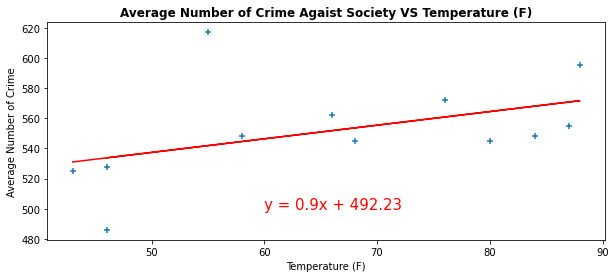

In [84]:
# Regression
plt.figure(figsize=(10,4))
x_avgsociety = savg_crime_climate['Temperature (F)']
y_avgsociety = savg_crime_climate['Average Number of Crime (Society)'].astype(int)

plt.scatter(x_avgsociety, y_avgsociety, marker='+')

# Labels
plt.xlabel('Temperature (F)')
plt.ylabel('Average Number of Crime')
plt.title('Average Number of Crime Agaist Society VS Temperature (F)', fontsize=12, fontweight='bold')
# plt.legend(loc="best")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avgsociety, y_avgsociety)
regress_values = x_avgsociety * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_avgsociety,regress_values,"r-")
plt.annotate(line_eq,(60,500),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-value shows a relatively weak positive correlation between temperature and the average number of crime against society. The r-squared is also low, which means that the model's prediction power is not very reliable. 

In [85]:
# Sort the df by temperature to get some insight
savg_crime_climate.sort_values('Temperature (F)', ascending=False)

# Create 4 bins to place average number of crime
bins = [40, 50, 67, 80, 90]

# Create labels for the bins
group_bins = ['Cold', 'Cool', 'Warm', 'Hot']

# Slice the data and place it into bins
bin_slice = pd.cut(savg_crime_climate['Temperature (F)'], bins, labels=group_bins)

# Create a new column where the data shows the bins they belong
savg_crime_climate['Temperature Category'] = bin_slice
savg_crime_climate

,Month,Average Number of Crime (Society),Temperature (F),Temperature Category
0,January,525.000000,43,Cold
1,February,528.000000,46,Cold
2,March,617.333333,55,Cool
3,April,562.666667,66,Cool
4,May,572.000000,76,Warm
5,June,548.666667,84,Hot
6,July,595.333333,88,Hot
7,August,555.000000,87,Hot
8,September,545.333333,80,Warm
9,October,545.000000,68,Warm


In [86]:
society_temp = savg_crime_climate.groupby("Temperature Category")

society_avg_temp = society_temp[["Average Number of Crime (Society)"]].mean()

society_avg_temp

,Average Number of Crime (Society)
Temperature Category,
Cold,513.111111
Cool,576.111111
Warm,554.111111
Hot,566.333333


In [87]:
#HYPOTHESIS TESTING 
# Setting up each temparture category group using the data from 2017, 2018 & 2019
cold = s_month_year_index_df[((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 12)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 12)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 12)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 1)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 1)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 1)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 2)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 2)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 2))]['Number of Crime Incidence']
                                        
cool = s_month_year_index_df[((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 11)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 11)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 11)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 3)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 3)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 3)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 4)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 4)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 4))]['Number of Crime Incidence']


warm = s_month_year_index_df[((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 5)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 5)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 5)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 9)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 9)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 9)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 10)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 10)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 10))]['Number of Crime Incidence']  

hot = s_month_year_index_df[((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 6)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 6)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 6)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 7)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 7)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 7)) |
                                       ((s_month_year_index_df['Year'] == 2017) & (s_month_year_index_df['Month'] == 8)) | 
                                       ((s_month_year_index_df['Year'] == 2018) & (s_month_year_index_df['Month'] == 8)) |
                                       ((s_month_year_index_df['Year'] == 2019) & (s_month_year_index_df['Month'] == 8))]['Number of Crime Incidence']

In [88]:
#perform ANOTA test
stats.f_oneway(cold, cool, warm, hot)

F_onewayResult(statistic=1.2078621059750112, pvalue=0.3226899695413077)

The p-value is > 0.05 and we fail to reject the null hypothesis for Crimes Against Society. This suggests that the difference in the number of crime against society for each temperature category is not statistically significant. This suggests that weather temperature does not influence crimes against society in Silver Spring, Maryland.

In [89]:
# Rose's code ends here

In [90]:
# Paul's code starts here - API!!!

In [91]:
# Paul's code ends here